<a href="https://colab.research.google.com/github/anuanu23/lung-cancer-detection/blob/main/LungCancer_13Oct2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing the Supproting Libraries to Run the Project

## pip install numpy pandas seaborn matplotlib keras tensorflow  sklearn  opencv-python  Pillow

In [ ]:
!python --version

Python 3.10.12


# Importing the Supporting Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import cv2,math,os,glob
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import tensorflow

In [ ]:
from tensorflow.keras.utils import plot_model


In [ ]:
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import   MaxPooling2D, Dropout, GlobalMaxPooling2D,AveragePooling2D
from keras.models import Model
from keras.preprocessing import image
#from keras.utils import layer_utils
#from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
#from keras.utils.vis_utils import model_to_dot
#from keras.utils import plot_model

# Listout the files in the input directory


In [ ]:
!wget https://www.dropbox.com/s/5t8a27g4j9kwr3k/LungCancer_Dataset.zip

--2023-11-08 18:36:44--  https://www.dropbox.com/s/5t8a27g4j9kwr3k/LungCancer_Dataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/5t8a27g4j9kwr3k/LungCancer_Dataset.zip [following]
--2023-11-08 18:36:44--  https://www.dropbox.com/s/raw/5t8a27g4j9kwr3k/LungCancer_Dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce1797fcb23d8d7e6e360eb81ec.dl.dropboxusercontent.com/cd/0/inline/CHIBHYbNdXr3oJgGyeQtWcnOh2oQMpbYqQgtlBn2siDOxNpXNWCMpnaOK6r_yWyobu5KE92AJgxfygGTP4Z5cO6FQ2o6M6jdZDyRHHNy1E-TXPPlWnBhoo9_kyhsOpifyT88UQEIVLzhnd8Dtjxucjzo/file# [following]
--2023-11-08 18:36:45--  https://uce1797fcb23d8d7e6e360eb81ec.dl.dropboxusercontent.com/cd/0/inline/CHIBHYbNdXr3oJgGyeQtWcnOh2oQMpbYqQgtlBn2siDOxNpXNWCMpnaOK6r_yWyobu5KE92

In [ ]:
!unzip LungCancer_Dataset.zip

Archive:  LungCancer_Dataset.zip
   creating: LungCancer_Dataset/
   creating: LungCancer_Dataset/train/
   creating: LungCancer_Dataset/train/AdenoCarcinoma/
  inflating: LungCancer_Dataset/train/AdenoCarcinoma/000000 (6).png  
  inflating: LungCancer_Dataset/train/AdenoCarcinoma/000005 (3).png  
  inflating: LungCancer_Dataset/train/AdenoCarcinoma/000005 (9).png  
  inflating: LungCancer_Dataset/train/AdenoCarcinoma/000008 (10).png  
  inflating: LungCancer_Dataset/train/AdenoCarcinoma/000009 (3).png  
  inflating: LungCancer_Dataset/train/AdenoCarcinoma/000009 (7).png  
  inflating: LungCancer_Dataset/train/AdenoCarcinoma/000013 (4).png  
  inflating: LungCancer_Dataset/train/AdenoCarcinoma/000013 (8).png  
  inflating: LungCancer_Dataset/train/AdenoCarcinoma/000014 (7).png  
  inflating: LungCancer_Dataset/train/AdenoCarcinoma/000015 (10).png  
  inflating: LungCancer_Dataset/train/AdenoCarcinoma/000015 (4).png  
  inflating: LungCancer_Dataset/train/AdenoCarcinoma/000015 (9).png  

In [ ]:
print(os.listdir("./LungCancer_Dataset/"))

['train']


In [ ]:
print(os.listdir("./LungCancer_Dataset/train"))

['SquamousCellCarcinoma', 'AdenoCarcinoma', 'Normal', 'LargeCellCarcinoma']


#

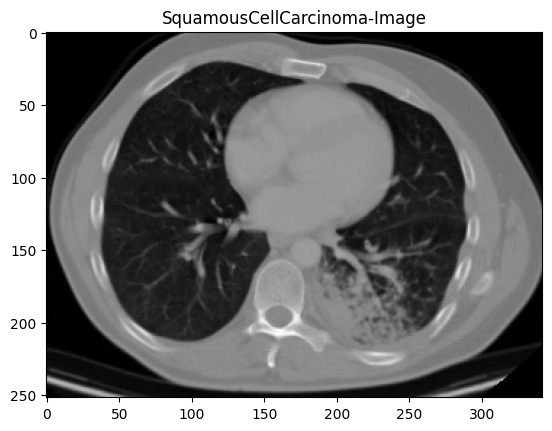

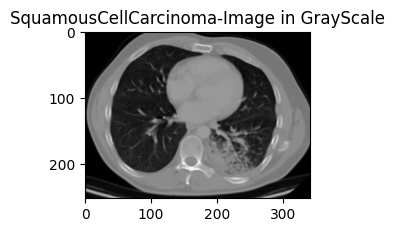

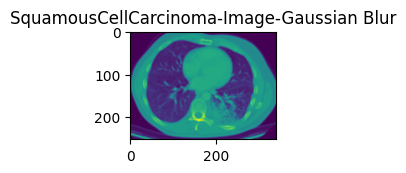

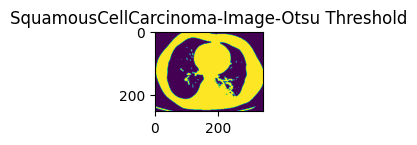

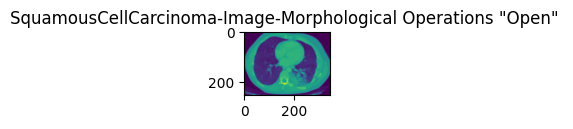

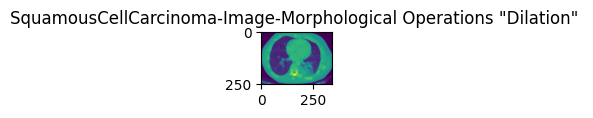

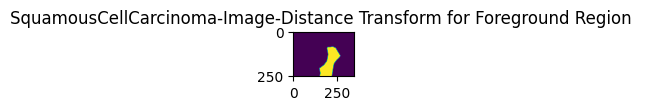

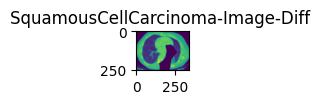

In [ ]:
kernel_matrix = np.ones((3,3),np.uint8) # 3*3 unit matrix --- to remove the noise --
inp_image=cv2.imread('./LungCancer_Dataset/train/SquamousCellCarcinoma/000002 (4).png')
plt.subplot(111)
plt.title('SquamousCellCarcinoma-Image')
plt.imshow(inp_image)
plt.show()
# GrayScale
img_gray=cv2.cvtColor(inp_image,cv2.COLOR_BGR2GRAY)
plt.subplot(122)
plt.title('SquamousCellCarcinoma-Image in GrayScale')
plt.imshow(img_gray,cmap = 'gray')
plt.show()
# Applying Gaussian Blur to the image
gauss_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
plt.subplot(133)
plt.title('SquamousCellCarcinoma-Image-Gaussian Blur')
plt.imshow(gauss_blur)
plt.show()
# Otsu Threshold (scaling to 0-255 range -- unsigned integer 8 bit format)
retvall, thresholdd = cv2.threshold(img_gray,0,255,cv2.THRESH_OTSU)
plt.subplot(144)
plt.title('SquamousCellCarcinoma-Image-Otsu Threshold')
plt.imshow(thresholdd)
plt.show()
# erosion followed by dilation (Morphological operations)
morph_open = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN,kernel_matrix,iterations=2 )
plt.subplot(155)
plt.title('SquamousCellCarcinoma-Image-Morphological Operations "Open" ')
plt.imshow(morph_open)
plt.show()
# Dilation (Morphological operations) for background
morph_dilate = cv2.dilate(morph_open,kernel_matrix,iterations=2)
plt.subplot(166)
plt.title('SquamousCellCarcinoma-Image-Morphological Operations "Dilation" ')
plt.imshow(morph_dilate)
plt.show()
# Based on Morphological operations -- Determining the Foreground part of the image
# In this operation, the gray level intensities of the points
# inside the foreground regions are changed to distance their respective distances from the closest 0 value
forgr_trans = cv2.distanceTransform(morph_open,cv2.DIST_L2,5)
retvall_1, thresholdd_forg1 = cv2.threshold(forgr_trans,0.7*forgr_trans.max(),255,0)
thresholdd_forg = np.uint8(thresholdd_forg1)
plt.subplot(177)
plt.title('SquamousCellCarcinoma-Image-Distance Transform for Foreground Region ')
plt.imshow(np.uint8(thresholdd_forg))
plt.show()
# Difference between Background & foreground
Difference_Image = cv2.subtract(morph_dilate,thresholdd_forg)
plt.subplot(188)
plt.title('SquamousCellCarcinoma-Image-Diff ')
plt.imshow(Difference_Image)
plt.show()



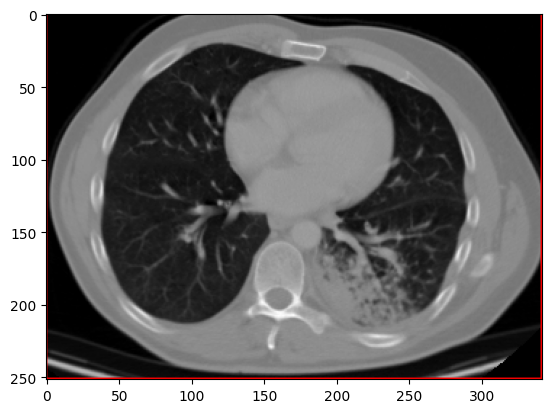

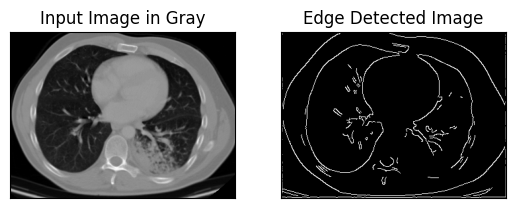

In [ ]:
# Marker labelling
ret, marked_region = cv2.connectedComponents(morph_dilate)
# background is not 0, but 1
marked_region = marked_region+1
# Now, mark the region of empty background as 0
marked_region[Difference_Image==255] = 0
#plt.imshow(marked_region)
#plt.show()
marked_region = cv2.watershed(inp_image,marked_region)
inp_image[marked_region == -1] = [255,0,0]
plt.imshow(inp_image)
plt.show()
# Sobel edge detection
img_edge=cv2.Canny(inp_image,200,300)
plt.subplot(121),plt.imshow(img_gray,cmap = 'gray' )
plt.title('Input Image in Gray'), plt.xticks([]), plt.yticks([])
#colormap - gray
plt.subplot(122),plt.imshow(img_edge,cmap = 'gray')
plt.title('Edge Detected Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Reading Image to get the values in pixels = product of (width * height * channels)

# i.e. rows * cols * dims


In [ ]:
img_data = []
predict_labels = []
img_ext = ['png']

In [ ]:
# for AdenoCarcinoma
files_name = []
image_dir = './LungCancer_Dataset/train/AdenoCarcinoma/'
[files_name.extend(glob.glob(image_dir + '*.' + e)) for e in img_ext]
display(files_name)

img_data.extend([cv2.imread(file) for file in files_name])

display(img_data)

predict_labels.extend(["AdenoCarcinoma" for file in files_name])
display(predict_labels)

['./LungCancer_Dataset/train/AdenoCarcinoma/000025 (6).png',
 './LungCancer_Dataset/train/AdenoCarcinoma/000065 (3).png',
 './LungCancer_Dataset/train/AdenoCarcinoma/000091 (3).png',
 './LungCancer_Dataset/train/AdenoCarcinoma/000054 (5).png',
 './LungCancer_Dataset/train/AdenoCarcinoma/000022.png',
 './LungCancer_Dataset/train/AdenoCarcinoma/000097 (3).png',
 './LungCancer_Dataset/train/AdenoCarcinoma/000016 (9).png',
 './LungCancer_Dataset/train/AdenoCarcinoma/000085 (4).png',
 './LungCancer_Dataset/train/AdenoCarcinoma/000005 (3).png',
 './LungCancer_Dataset/train/AdenoCarcinoma/000054 (6).png',
 './LungCancer_Dataset/train/AdenoCarcinoma/000035 (5).png',
 './LungCancer_Dataset/train/AdenoCarcinoma/000005 (9).png',
 './LungCancer_Dataset/train/AdenoCarcinoma/000020 (5).png',
 './LungCancer_Dataset/train/AdenoCarcinoma/000102.png',
 './LungCancer_Dataset/train/AdenoCarcinoma/000081 (2).png',
 './LungCancer_Dataset/train/AdenoCarcinoma/000022 (2).png',
 './LungCancer_Dataset/train/Ade

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [1, 1, 1],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

['AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarci

In [ ]:
# for LargeCellCarcinoma
files_name = []
image_dir = './LungCancer_Dataset/train/LargeCellCarcinoma/'
[files_name.extend(glob.glob(image_dir + '*.' + e)) for e in img_ext]
display(files_name)

img_data.extend([cv2.imread(file) for file in files_name])

display(img_data)

predict_labels.extend(["LargeCellCarcinoma" for file in files_name])
display(predict_labels)

['./LungCancer_Dataset/train/LargeCellCarcinoma/000032.png',
 './LungCancer_Dataset/train/LargeCellCarcinoma/000026 (2).png',
 './LungCancer_Dataset/train/LargeCellCarcinoma/000041.png',
 './LungCancer_Dataset/train/LargeCellCarcinoma/000069.png',
 './LungCancer_Dataset/train/LargeCellCarcinoma/000098 (4).png',
 './LungCancer_Dataset/train/LargeCellCarcinoma/000084 (2).png',
 './LungCancer_Dataset/train/LargeCellCarcinoma/000031.png',
 './LungCancer_Dataset/train/LargeCellCarcinoma/000041 (4).png',
 './LungCancer_Dataset/train/LargeCellCarcinoma/000094 (3).png',
 './LungCancer_Dataset/train/LargeCellCarcinoma/l3.png',
 './LungCancer_Dataset/train/LargeCellCarcinoma/000062 (4).png',
 './LungCancer_Dataset/train/LargeCellCarcinoma/000019 (3).png',
 './LungCancer_Dataset/train/LargeCellCarcinoma/000034 (2).png',
 './LungCancer_Dataset/train/LargeCellCarcinoma/000057 (3).png',
 './LungCancer_Dataset/train/LargeCellCarcinoma/000080.png',
 './LungCancer_Dataset/train/LargeCellCarcinoma/00013

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [1, 1, 1],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

['AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarci

In [ ]:
# for SquamousCellCarcinoma
files_name = []
image_dir = './LungCancer_Dataset/train/SquamousCellCarcinoma/'
[files_name.extend(glob.glob(image_dir + '*.' + e)) for e in img_ext]
display(files_name)

img_data.extend([cv2.imread(file) for file in files_name])

display(img_data)

predict_labels.extend(["SquamousCellCarcinoma" for file in files_name])
display(predict_labels)

['./LungCancer_Dataset/train/SquamousCellCarcinoma/000081 (6).png',
 './LungCancer_Dataset/train/SquamousCellCarcinoma/000067 (5).png',
 './LungCancer_Dataset/train/SquamousCellCarcinoma/000032.png',
 './LungCancer_Dataset/train/SquamousCellCarcinoma/000006 (4).png',
 './LungCancer_Dataset/train/SquamousCellCarcinoma/000035 (5).png',
 './LungCancer_Dataset/train/SquamousCellCarcinoma/000049 (3).png',
 './LungCancer_Dataset/train/SquamousCellCarcinoma/000030 (5).png',
 './LungCancer_Dataset/train/SquamousCellCarcinoma/000055 (2).png',
 './LungCancer_Dataset/train/SquamousCellCarcinoma/000041 (4).png',
 './LungCancer_Dataset/train/SquamousCellCarcinoma/000010 (6).png',
 './LungCancer_Dataset/train/SquamousCellCarcinoma/000053.png',
 './LungCancer_Dataset/train/SquamousCellCarcinoma/000013 (6).png',
 './LungCancer_Dataset/train/SquamousCellCarcinoma/000094 (3).png',
 './LungCancer_Dataset/train/SquamousCellCarcinoma/000060 (2).png',
 './LungCancer_Dataset/train/SquamousCellCarcinoma/00008

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [1, 1, 1],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

['AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarci

In [ ]:
# for Normal
files_name = []
image_dir = './LungCancer_Dataset/train/Normal/'
[files_name.extend(glob.glob(image_dir + '*.' + e)) for e in img_ext]
display(files_name)

img_data.extend([cv2.imread(file) for file in files_name])

display(img_data)

predict_labels.extend(["Normal" for file in files_name])
display(predict_labels)

['./LungCancer_Dataset/train/Normal/10 - Copy - Copy.png',
 './LungCancer_Dataset/train/Normal/2 (2) - Copy.png',
 './LungCancer_Dataset/train/Normal/21 - Copy (2).png',
 './LungCancer_Dataset/train/Normal/12 - Copy (3).png',
 './LungCancer_Dataset/train/Normal/10 - Copy (2) - Copy.png',
 './LungCancer_Dataset/train/Normal/8 - Copy.png',
 './LungCancer_Dataset/train/Normal/19 - Copy (2) - Copy.png',
 './LungCancer_Dataset/train/Normal/12 (2).png',
 './LungCancer_Dataset/train/Normal/11 - Copy (2) - Copy.png',
 './LungCancer_Dataset/train/Normal/8 (2).png',
 './LungCancer_Dataset/train/Normal/7.png',
 './LungCancer_Dataset/train/Normal/17 - Copy (2) - Copy.png',
 './LungCancer_Dataset/train/Normal/4 - Copy (2).png',
 './LungCancer_Dataset/train/Normal/10.png',
 './LungCancer_Dataset/train/Normal/17 (2) - Copy.png',
 './LungCancer_Dataset/train/Normal/17 - Copy (3).png',
 './LungCancer_Dataset/train/Normal/16 - Copy.png',
 './LungCancer_Dataset/train/Normal/17 - Copy (2).png',
 './LungCa

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [1, 1, 1],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

['AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarcinoma',
 'AdenoCarci

# Ressizing the Image data

In [ ]:
img_size = (256,256)
img_data_new = np.array([cv2.resize(i, img_size, interpolation = cv2.INTER_AREA) for i in img_data])
display(img_data_new)

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [1, 1, 1],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

# creating a numpy array for Prediction class label

In [ ]:
prediction_class_label = np.array(predict_labels)
prediction_class_label

array(['AdenoCarcinoma', 'AdenoCarcinoma', 'AdenoCarcinoma',
       'AdenoCarcinoma', 'AdenoCarcinoma', 'AdenoCarcinoma',
       'AdenoCarcinoma', 'AdenoCarcinoma', 'AdenoCarcinoma',
       'AdenoCarcinoma', 'AdenoCarcinoma', 'AdenoCarcinoma',
       'AdenoCarcinoma', 'AdenoCarcinoma', 'AdenoCarcinoma',
       'AdenoCarcinoma', 'AdenoCarcinoma', 'AdenoCarcinoma',
       'AdenoCarcinoma', 'AdenoCarcinoma', 'AdenoCarcinoma',
       'AdenoCarcinoma', 'AdenoCarcinoma', 'AdenoCarcinoma',
       'AdenoCarcinoma', 'AdenoCarcinoma', 'AdenoCarcinoma',
       'AdenoCarcinoma', 'AdenoCarcinoma', 'AdenoCarcinoma',
       'AdenoCarcinoma', 'AdenoCarcinoma', 'AdenoCarcinoma',
       'AdenoCarcinoma', 'AdenoCarcinoma', 'AdenoCarcinoma',
       'AdenoCarcinoma', 'AdenoCarcinoma', 'AdenoCarcinoma',
       'AdenoCarcinoma', 'AdenoCarcinoma', 'AdenoCarcinoma',
       'AdenoCarcinoma', 'AdenoCarcinoma', 'AdenoCarcinoma',
       'AdenoCarcinoma', 'AdenoCarcinoma', 'AdenoCarcinoma',
       'AdenoCarcinoma',

In [ ]:
# Flip the Data (left to right)

In [ ]:
img_data_LR = [np.fliplr(img_data_new[i]) for i in range(len(img_data_new))]
prediction_class_label_LR = [prediction_class_label[i] for i in range(len(prediction_class_label))]

In [ ]:
# Concatenate the data & apply dummies to the dataa

# Adding dummies to the prediction class

In [ ]:
new_img_data =  np.concatenate([img_data_new, img_data_LR])
new_prediction_class_label =  pd.get_dummies(np.array( np.concatenate([prediction_class_label, prediction_class_label_LR])))

In [ ]:
new_prediction_class_label

,AdenoCarcinoma,LargeCellCarcinoma,Normal,SquamousCellCarcinoma
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1197,0,0,1,0
1198,0,0,1,0
1199,0,0,1,0
1200,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
XX = new_img_data
YY = new_prediction_class_label

X_train, X_test, Y_train, Y_test = train_test_split(, new_prediction_class_label, test_size=.05 ,stratify=new_prediction_class_label)

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

In [ ]:
# Input image shape

In [ ]:
rr,cc = img_size
cc

256

# Network creation

In [ ]:
mdll=[]

In [ ]:
image_size = (rr, cc, 3)
# input layer
layer_inp = Input(image_size)
" set 1"
# adding padding layer
mdll = ZeroPadding2D((3, 3))(layer_inp)    # padd the image with zeros matrix
# conv layer
mdll= Conv2D(32, (7, 7), strides = (1, 1), name = 'convl_0')(mdll)
# normalization
mdll = BatchNormalization(axis = 3, name = 'nn_1')(mdll)
# activation layer --- (max)
mdll = Activation('relu')(mdll)
# Max pooling
mdll = MaxPooling2D((2, 2), name='max_pooling_1')(mdll)  # AveragePooling2D
" set 2"
mdll= Conv2D(32, (3, 3), strides = (1, 1), name = 'convl_1')(mdll)
# normalization
mdll = BatchNormalization(axis = 3, name = 'nn_2')(mdll)
# activation layer --- (max)
mdll = Activation('relu')(mdll)
# Max pooling
mdll = MaxPooling2D((2, 2), name='max_pooling_2')(mdll)# MaxPooling2D  AveragePooling2D

" set 3"
mdll= Conv2D(32, (3, 3), strides = (1, 1), name = 'convl_2')(mdll)
# normalization
mdll = BatchNormalization(axis = 3, name = 'nn_3')(mdll)
# activation layer --- (max)
mdll = Activation('relu')(mdll)
# Max pooling
mdll = MaxPooling2D((2, 2), name='max_pooling_3')(mdll)# MaxPooling2D  AveragePooling2D

In [ ]:
# flattern the data
mdll = Flatten()(mdll)
# activation - relu
mdll = Dense(1024, activation="selu")(mdll)
#mdll = Dense(512, activation="relu")(mdll)
# dropout -- avoid overfitt
mdll = Dropout(0.3)(mdll)
# adding dense layer
mdll = Dense(4, activation='softmax', name='fully_connected')(mdll)

In [ ]:
Network_Model = Model(inputs = layer_inp, outputs = mdll , name='LungCancer')

In [ ]:
Network_Model.summary()

Model: "LungCancer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 zero_padding2d (ZeroPaddin  (None, 262, 262, 3)       0         
 g2D)                                                            
                                                                 
 convl_0 (Conv2D)            (None, 256, 256, 32)      4736      
                                                                 
 nn_1 (BatchNormalization)   (None, 256, 256, 32)      128       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 max_pooling_1 (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                     

In [ ]:
## Save the Model
from keras.models import model_from_json
# serialize model to json
json_model = Network_Model.to_json()
with open('LungCancer_mdl.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
Network_Model.save_weights('LungCancer_mdl.h5')

jsonMDL = open('./LungCancer_mdl.json', 'r')
jsonMDL_load= jsonMDL.read() # read the json file (Seq network model)
jsonMDL.close()# close the json
JSON_MODEL = model_from_json(jsonMDL_load)
display(JSON_MODEL)
# load weights into  model
JSON_MODEL.load_weights("LungCancer_mdl.h5")
    

In [ ]:
XX.shape

(1202, 256, 256, 3)

In [ ]:
YY.shape

(1202, 4)

In [ ]:
# Network_Model.compile(optimizer="sgd", loss="mean_squared_error", metrics=["accuracy"])
Network_Model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

In [ ]:
# Network_Model.fit(x=XX, y=YY, epochs=12, batch_size=32)
Network_Model.fit(x=XX, y=YY, epochs=50, batch_size=32)



Epoch 1/50
38/38 [==============================] - 212s 6s/step - loss: 0.3963 - accuracy: 0.7662
Epoch 2/50
38/38 [==============================] - 197s 5s/step - loss: 0.3671 - accuracy: 0.7704
Epoch 3/50
38/38 [==============================] - 195s 5s/step - loss: 0.3092 - accuracy: 0.7829
Epoch 4/50
38/38 [==============================] - 200s 5s/step - loss: 0.2299 - accuracy: 0.8478
Epoch 5/50
38/38 [==============================] - 196s 5s/step - loss: 0.2421 - accuracy: 0.8502
Epoch 6/50
38/38 [==============================] - 209s 6s/step - loss: 0.2688 - accuracy: 0.8577
Epoch 7/50
38/38 [==============================] - 217s 6s/step - loss: 0.1570 - accuracy: 0.9118
Epoch 8/50
38/38 [==============================] - 210s 6s/step - loss: 0.1420 - accuracy: 0.9160
Epoch 9/50
38/38 [==============================] - 196s 5s/step - loss: 0.1093 - accuracy: 0.9243
Epoch 10/50
38/38 [==============================] - 205s 5s/step - loss: 0.0807 - accuracy: 0.9534
Epoch 11/

# processing the test data

In [ ]:
!wget https://www.dropbox.com/s/42p79z115rd7gxc/for_LungCancer_testing.zip

In [ ]:
!unzip for_LungCancer_testing.zip

In [ ]:
# for test
test_image_data =[]
test_files_name = []
X_test =[]
img_ext1 = ['png']
image_dir = './for_testing/'
[test_files_name.extend(glob.glob(image_dir + '*.' + e)) for e in img_ext1]
display(test_files_name)

test_image_data.extend([cv2.imread(file) for file in test_files_name])

display(test_image_data)


In [ ]:
test_image_size = (256, 256)
test_image_data_new = [cv2.resize(d, test_image_size, interpolation = cv2.INTER_AREA) for d in test_image_data]

X_test = np.array(test_image_data_new)
test_class_label = test_files_name
test_class_label

In [ ]:
predicted_data_1 = Network_Model.predict(x=X_test)
predicted_data_1 = [np.argmax(predicted_data_1[i]) for i in range(len(predicted_data_1))]
predicted_data_1

In [ ]:
#predicted_data = [np.argmax(predicted_data[i]) for i in range(len(predicted_data))]
for uu in range(len(predicted_data_1)):
    if  (predicted_data_1[uu] == 0):
        predicted_data_1[uu] = 'AdenoCarcinoma'
    if  (predicted_data_1[uu] == 1):
        predicted_data_1[uu] = 'LargeCellCarcinoma'
    if  (predicted_data_1[uu] == 2):
        predicted_data_1[uu] = 'Normal'
    if  (predicted_data_1[uu] == 3):
        predicted_data_1[uu] = 'SquamousCellCarcinoma'

In [ ]:
predicted_data = Network_Model.predict(x=X_test)
predicted_data

In [ ]:
predicted_data2 = [np.argmax(predicted_data[i]) for i in range(len(predicted_data))]

for uu1 in range(len(predicted_data2)):
    if  (predicted_data2[uu1] == 0):
        predicted_data2[uu1]= 'Stage 1 - AdenoCarcinoma - Advised to take Chemotheraphy'
    if  (predicted_data2[uu1] == 1):
        predicted_data2[uu1] = 'Stage 2 - LargeCellCarcinoma - Advised to take Radiotheraphy & Chemotheraphy'
    if  (predicted_data2[uu1] == 2):
        predicted_data2[uu1] = 'Normal - Avoid Smoking'
    if  (predicted_data2[uu1] == 3):
        predicted_data2[uu1] = 'Stage 3 - SquamousCellCarcinoma - Advised to take Surgical ReSection'

In [ ]:
submission = pd.DataFrame(list(zip(predicted_data_1, test_class_label,predicted_data2)), columns=["Image_Category", "File_Name","Remedies(To Overcome the Disease)"])

In [ ]:
submission

In [ ]:
submission.to_csv('test_prediction_result.csv')